# **Assignment \#2**: Machine Learning MC886
University of Campinas (UNICAMP), Institute of Computing (IC)

Prof. Sandra Avila, 2020s2



In [ ]:
# TODO: RA & Name 
print('RA1: 193400' + ' Alan Freitas Ribeiro')
print('RA2: ' + 'Desistiu')

## Objective 

Explore **classification techniques** (logistic regression & neural networks) and come up with the best possible model to the problem, avoiding overfitting. In particular, build an object recognition system to accurately classify images using the Fashion-MNIST dataset (https://github.com/zalandoresearch/fashion-mnist).

## Dataset

Fashion-MNIST is a dataset of Zalando's article images, consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.


Each training and test example is assigned to one of the following labels:

**Label 	Description**
- 0 	t-shirt/top
- 1 	trouser
- 2 	pullover
- 3 	dress
- 4 	coat
- 5 	sandal
- 6 	shirt
- 7 	sneaker
- 8 	bag
- 9 	ankle boot

**Dataset Information:**

- You should respect the following traininig/test split: 60,000 training examples, and 10,000 test examples. Avoid overfitting.
- The data is available at: https://www.dropbox.com/s/qawunrav8ri0sp4/fashion-mnist-dataset.zip: 'train' folder (fashion-mnist_train.csv.zip) + 'test' folder (fashion-mnist_test.csv.zip)	
- Each row is a separate image. Column 1 is the class label. Remaining columns are pixel numbers (784 total). Each value is the darkness of the pixel (1 to 255). Dataset was converted to CSV with this script: https://pjreddie.com/projects/mnist-in-csv.


## Deadline

Monday, November 16th 7pm. 

Penalty policy for late submission: You are not encouraged to submit your assignment after due date. However, in case you did, your grade will be penalized as follows:
- November 17th 7pm : grade * 0.75
- November 18th 7pm : grade * 0.5
- November 19th 7pm : grade * 0.25


## Submission

On Google Classroom, submit your Jupyter Notebook (in Portuguese or English).

**This activity is NOT individual, it must be done in pairs (two-person group).**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
'''
TODO: Load and preprocess your dataset. Plot graphics.
'''

import numpy as np
import pandas as pd
import matplotlib.colors
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix


dados_treino = pd.read_csv("/content/drive/My Drive/Colab/fashion-mnist_train.csv", sep=',')
dados_teste = pd.read_csv("/content/drive/My Drive/Colab/fashion-mnist_train.csv", sep=',')
dados_treino = dados_treino.to_numpy()
dados_teste = dados_teste.to_numpy()

#Normaliza os dados.
def normalizacao (data):
  data = data.astype(float)
  dados = data[:,1:]
  num_colunas = dados.shape[1]
  for i in range(num_colunas):
    coluna_norm = dados[:,i]
    media = coluna_norm.mean()
    max_col = coluna_norm.max()
    dados[:,i] = (dados[:,i]-media)/max_col
  data[:,1:]=dados
  return data

#Função para One-hot encoding.
def hot_encod(y, num_classes):
  aux = np.zeros((num_classes,1))
  aux[int(y)] = 1.0
  return aux.T.astype(int)

#Dados para o MLR
dados_treino = normalizacao(dados_treino)
dados_teste = normalizacao(dados_teste)

#Dados para a rede neural
#Dados de treino
y = [hot_encod(y,10) for y in dados_treino[:,0]]
x = dados_treino[:,1:]

#Dados de teste
y_teste = [hot_encod(yt,10) for yt in dados_teste[:,0]]
x_teste = dados_teste[:,1:]

## Activities

1. (2 points) Perform Multinomial Logistic Regression (_i.e._, softmax regression). It is a generalization of Logistic Regression to the case where we want to handle multiple classes. **You should implement your solution**.


In [ ]:
# TODO: Multinomial Logistic Regression. Implement your solution. You cannot use scikit-learn libraries.

num_classes = 10
num_features = 784
#Inicia aleatoriamente o peso e o bias para a função de predição.
peso = np.random.rand(num_classes, num_features)
bias = np.random.rand(num_classes, 1)

#Função para calcular porcentagem de acertos.
def acertos(predicao, data):
  acertos = 0
  for i in range(len(predicao)):
    if predicao[i] == data[i,0]:
      acertos += 1
  return ((acertos/len(predicao))*100)

#Função de predição.
def predlog(data,peso,bias):
  features = data[:,1:]
  logistica = np.array(np.empty([features.shape[0],peso.shape[0]]))
  for i in range(features.shape[0]):
    logistica[i] = (peso.dot(features[i].reshape(-1,1)) + bias).reshape(-1)
  return logistica

#Função para calcular a probabilidade.
def prob(logistica):
  prob = np.array(np.empty([logistica.shape[0],logistica.shape[1]]))
  for i in range(logistica.shape[0]):
    exponencial = np.exp(logistica[i])
    soma = np.sum(exponencial)
    prob[i] = exponencial/soma
  return prob

#Função para calcular Regressão Logistica.
def reglog(data,peso,bias):
  logistica = predlog(data,peso,bias)
  probabilidade = prob(logistica)
  resultado = np.empty(0)
  for i in probabilidade:
    resultado = np.append(resultado,np.argmax(i))
  return resultado.astype(int), probabilidade

#Função para calcular o custo.
def custoreglog(data, probabilidade):
  y = data[:,0].astype(int)
  tam = y.shape[0]
  log = -np.log(probabilidade[range(tam),y]+1e-9)
  custoreglog = np.sum(log) / tam
  return custoreglog

#Função para treino com SGD.
def sgdlog(data,peso,bias,epocas,learning_rate):
  y = data[:,0].astype(int)
  x = data[:,1:]
  custo = np.array([])
  for i in range(epocas):
    _ , prob = reglog(data,peso,bias)
    custo_temp = custoreglog(data,prob)
    custo = np.append(custo,custo_temp)
    prob[range(y.shape[0]),y] -= 1

    p_grad = prob.T.dot(x)
    b_grad = np.sum(prob,axis=0).reshape(-1,1)

    peso -= (learning_rate*p_grad)
    bias -= (learning_rate*b_grad)

  return custo, peso, bias 

#Treinamento
custo, peso_treinado, bias_treinado = sgdlog(dados_treino,peso,bias,100,1e-4)

#Resultado final
pred_final, prob_final = reglog(dados_teste,peso_treinado,bias_treinado)

acertos = acertos(pred_final, dados_teste)

print('Acerto usando os dados de teste: ', acertos, '%')

Acerto usando os dados de teste:  79.21833333333333 %


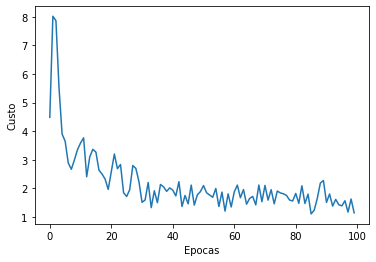

In [ ]:
plt.xlabel('Epocas')
plt.ylabel('Custo')
plt.plot(custo)


> What are the conclusions? (1-2 paragraphs)

O desempenho foi perto do esperado tendo em vista que utilizamos apenas 100 epocas para rodar o algoritmo, chegamos a uma taxa de acerto de aproximadamente 79%. Usamos o metodo estocastico, onde obtivemos uma queda gradual do erro com uma certa estabilização apartir da epoca 40 como podemos notar no grafico acima, apresentando um certo ruido devido a estocasticidade do algoritmo.

Porém encontramos algumas falhas durante sua execução, a mais notavel foi que para um learning rate maior que 1e-4, o algoritmo não convergia, havendo overflow. Tal fato pode ter sido causado pela alta diferença dos valores iniciais ao serem elevados a uma exponencial, necessitando assim, de uma correção numerica. Além disso, notamos um impacto consideravel na inicialização randomica dos pesos e bias, ao passo que, ao executarmos este algoritmo diversas vezes, obtivemos resultados diferentes, alguns, muito abaixo deste valor final encontrado, com o custo se estabilizando em um valor muito alto. (O pior resultado foi de aprox. 37% de acertos). 




2. (6 points) Move on to Neural Networks, using _one_ or _two hidden layers_. **You should implement your solution** (weight & bias initialization, forward propagation, backward propagation, activation function, ...).


In [ ]:
# TODO: Neural Network. Implement your solution. You cannot use scikit-learn libraries.

num_hl = x.shape[1] #Numero de neuronios na camada escondida.

np.random.seed(3772)
peso_hl = np.random.rand(x.shape[1],num_hl)*((2.0/x.shape[1])**(0.5))
peso_saida = np.random.rand(num_hl,y[0].shape[1])*((2.0/x.shape[1])**(0.5))
bias_hl = np.random.rand(1)*((2.0/x.shape[1])**(0.5))
bias_saida = np.random.rand(1)*((2.0/x.shape[1])**(0.5))

#Funcao de acertos.
def acertosneur(predicao, y):
  acertos = 0
  for i,j in zip(predicao,y):
    if np.argmax(i) == np.argmax(j):
      acertos += 1
  return ((acertos/len(y))*100)

#Função de ativação.
def ativacao(camada):  
  return (1 / (1+np.exp(-camada)))

#Função derivada da ativação (Sigmoide).
def der_ativ(camada):
  return (ativacao(camada)*(1.0-ativacao(camada)))

#Função forward propagation.
def forwardprop(x,peso_hl,peso_saida, bias_hl, bias_saida):
  hidden_layer = np.dot(x,peso_hl) + bias_hl
  hidden_layer = ativacao(hidden_layer)
  saida = np.dot(hidden_layer,peso_saida) + bias_saida
  saida = ativacao(saida)
  return hidden_layer, saida

#Função back propagation.
def backprop(x,y,peso_hl,peso_saida,bias_hl,bias_saida):
  x = x.reshape((1,-1))
  hidden_layer, saida = forwardprop(x,peso_hl,peso_saida,bias_hl,bias_saida)  

  custo = (y-saida)**2
  der_bias_saida = 2*(y-saida)*der_ativ(saida)
  der_ps = hidden_layer.T.dot(der_bias_saida)
  der_bias_hl = der_bias_saida.dot(peso_saida.T)*der_ativ(hidden_layer)
  der_phl = x.T.dot(der_bias_hl)

  return der_bias_saida.mean(), der_bias_hl.mean(), der_ps, der_phl, custo.sum()

def sgdneur(x,y,peso_hl,peso_saida,bias_hl,bias_saida,epocas,learning_rate):
  
  custo = np.array([])

  for i in range(epocas):
    treino = zip(x,y)
    for t in treino:
      dbs, dbhl, dps, dphl, custo_temp = backprop(t[0],t[1],peso_hl,peso_saida,bias_hl,bias_saida)
      custo = np.append(custo,custo_temp)

      bias_saida -= learning_rate*dbs
      bias_hl -= learning_rate*dbhl
      peso_saida -= learning_rate*dps
      peso_hl -= learning_rate*dphl

  return bias_saida, bias_hl, peso_saida, peso_hl, custo

#Treino
bs,bhl,ps,phl,custo = sgdneur(x,y,peso_hl,peso_saida,bias_hl,bias_saida,10,1e-2)
%store custo
#Teste
_, saida = forwardprop(x_teste,phl,ps, bhl, bs)
%store saida
print('Acertos com os dados de teste:', acertosneur(saida,y_teste), '%')

Stored 'custo' (ndarray)
Stored 'saida' (ndarray)
Acertos com os dados de teste: 85.35166666666667 %


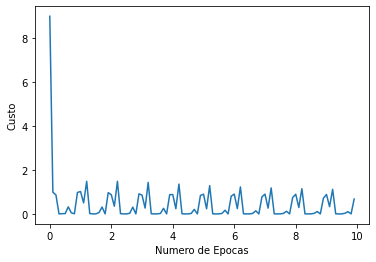

In [ ]:
custo_plt_1 = np.array([])
j = 0
for i in range(0,600000,6000):
  custo_plt_1 = np.append(custo_plt_1, custo[i])
  j += 1

plt.xticks([0,20,40,60,80,100],['0','2','4','6','8','10'])
plt.xlabel('Numero de Epocas')
plt.ylabel('Custo')
plt.plot(custo_plt_1)

> What are the conclusions? Regarding the Multinomial Logistic Regression model, does the performance improve? (2-4 paragraphs)


Rodamos o algoritmo final em 10 epocas, e conseguimos um resultado de 85% de acertos, além desta versão final, foi rodado o algoritmo com outras seeds de randomização e diminuimos/aumentamos o numero de epocas e o learning rate como teste. O resultado foi dentro da margem dos 80-85% de acerto, onde percebemos que o numero de epocas após 5, não influenciava muito no resultado, havia maior variação no resultado quando trocavamos de seed e os learning rate não influenciaram muito também, com os melhores resultados sendo obtidos com o learning rate de 1e-2 (foram escolhidos 1e-1,1e-2 e 1e-3).

Podemos perceber esse comportamento no gráfico acima da versão final, onde o erro se estabiliza ao rodar 2 epocas apenas, tal comportamento se repetiu durante os testes. Tal fato pode ter ocorrido por não termos usado nesta versão otimizadores de descida do gradiente e o mesmo ter ficado ''preso'' em um minimo local que não era o de melhor otimização (global).

A performace em comparação com o MLR foi melhor como o esperado, ao rodar 100 epocas no MLR chegamos a um acerto de 79% contra 85% com a rede neural. Porém, o custo de treinamento do MLR foi bem menor que a da rede neural, onde executamos 100 epocas em aproximadamente 5 minutos ao contrario da rede neural, que levou aprox. 50 minutos para executar 10 epocas, tais processos poderiam ser otimizados ao usarmos uma gpu, porém, não tivemos êxito em instalar o CuPy neste ambiente de execução.

Além disso, alguns outros problemas encontrados no MLR não foram reproduzidos no algoritmo da rede neural, como a não convergencia para um learning rate acima de 1e-4 e o impacto sofrido com as inicializações randomicas, onde no MLR tinhamos variações as vezes muito bruscas ao passo que na rede neural a variação era bem pequena e não afetava muito o resultado. Sendo assim, podemos dizer que nosso algoritmo de rede neural possui uma melhor perfomace em comparação ao MLR, por ser mais estavel e apresentar uma taxa de acerto maior, mesmo apresentando um tempo de execução do treinamento bem maior.

3. (1 point) Apply two update rules used to optimize Neural Networks (for example, Momentum, Adagrad, Adam, RMSProp, Adadelta). For reference, see http://ruder.io/optimizing-gradient-descent.

In [ ]:
# TODO: Apply two update rules used to optimize Neural Networks.

num_hl = x.shape[1] #Numero de neuronios na camada escondida.

np.random.seed(3772)
peso_hl = np.random.rand(x.shape[1],num_hl)*((2.0/x.shape[1])**(0.5))
peso_saida = np.random.rand(num_hl,y[0].shape[1])*((2.0/x.shape[1])**(0.5))
bias_hl = np.random.rand(1)*((2.0/x.shape[1])**(0.5))
bias_saida = np.random.rand(1)*((2.0/x.shape[1])**(0.5))

#Funcao de acertos.
def acertosneur(predicao, y):
  acertos = 0
  for i,j in zip(predicao,y):
    if np.argmax(i) == np.argmax(j):
      acertos += 1
  return ((acertos/len(y))*100)

#Função de ativação.
def ativacao(camada):  
  return (1 / (1+np.exp(-camada)))

#Função derivada da ativação (Sigmoide).
def der_ativ(camada):
  return (ativacao(camada)*(1.0-ativacao(camada)))

#Função forward propagation.
def forwardprop(x,peso_hl,peso_saida, bias_hl, bias_saida):
  hidden_layer = np.dot(x,peso_hl) + bias_hl
  hidden_layer = ativacao(hidden_layer)
  saida = np.dot(hidden_layer,peso_saida) + bias_saida
  saida = ativacao(saida)
  return hidden_layer, saida

#Função back propagation.
def backprop(x,y,peso_hl,peso_saida,bias_hl,bias_saida):
  x = x.reshape((1,-1))
  hidden_layer, saida = forwardprop(x,peso_hl,peso_saida,bias_hl,bias_saida)  

  custo = (y-saida)**2
  der_bias_saida = 2*(y-saida)*der_ativ(saida)
  der_ps = hidden_layer.T.dot(der_bias_saida)
  der_bias_hl = der_bias_saida.dot(peso_saida.T)*der_ativ(hidden_layer)
  der_phl = x.T.dot(der_bias_hl)

  return der_bias_saida.mean(), der_bias_hl.mean(), der_ps, der_phl, custo.sum()

#Nesterov Acelerated Gradient
def gdnesterov(x,y,peso_hl,peso_saida,bias_hl,bias_saida,epocas,learning_rate, gama=0.9):
  
  custo = np.array([])

  for i in range(epocas):

    #Randomiza as entradas x e y
    rand_seed = np.random.get_state()
    np.random.shuffle(x)
    np.random.set_state(rand_seed)
    np.random.shuffle(y)
    treino = zip(x,y)

    velocidade = np.array([np.zeros(bias_saida.shape),np.zeros(bias_hl.shape),np.zeros(peso_saida.shape),np.zeros(peso_hl.shape)])

    for t in treino:
      n_bs = bias_saida - gama*velocidade[0]
      n_bhl = bias_hl - gama*velocidade[1]
      n_ps = peso_saida - gama*velocidade[2]
      n_phl = peso_hl - gama*velocidade[3]
      
      dbs, dbhl, dps, dphl, custo_temp = backprop(t[0],t[1],n_phl,n_ps,n_bhl,n_bs)
      custo = np.append(custo,custo_temp)

      velocidade[0] = gama*velocidade[0] + learning_rate*dbs
      bias_saida -= velocidade[0]

      velocidade[1] = gama*velocidade[1] + learning_rate*dbhl
      bias_hl -= velocidade[1]

      velocidade[2] = gama*velocidade[2] + learning_rate*dps
      peso_saida -= velocidade[2]

      velocidade[3] = gama*velocidade[3] + learning_rate*dphl
      peso_hl -= velocidade[3]

  return bias_saida, bias_hl, peso_saida, peso_hl, custo

#Treino
bs,bhl,ps,phl,custo_nesterov = gdnesterov(x,y,peso_hl,peso_saida,bias_hl,bias_saida,5,1e-2)
%store custo_nesterov
#Teste
_, saida_nesterov = forwardprop(x_teste,phl,ps, bhl, bs)
%store saida_nesterov
print('Acertos com os dados de teste:', acertosneur(saida_nesterov,y_teste), '%')

Stored 'custo_nesterov' (ndarray)
Stored 'saida_nesterov' (ndarray)
Acertos com os dados de teste: 85.49 %


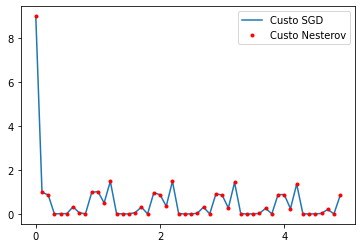

In [ ]:
custo_plt_1 = np.array([])
j = 0
for i in range(0,300000,6000):
  custo_plt_1 = np.append(custo_plt_1, custo[i])
  j += 1

custo_plt_2 = np.array([])
j = 0
for i in range(0,300000,6000):
  custo_plt_2 = np.append(custo_plt_2, custo[i])
  j += 1

fig, grap = plt.subplots()
plt.xticks([0,20,40,60,80,100],['0','2','4','6','8','10'])
grap.plot(custo_plt_1, label='Custo SGD')
grap.plot(custo_plt_2, 'ro', markersize='3', label='Custo Nesterov')
leg = grap.legend()

 > What are the conclusions? Does the performance improve? (1-2 paragraphs)

 Neste algoritmo, implementamos o embaralhamento dos dados para evitar o enviesamento. Para a otimização de descida do gradiente, primeiramente tentamos implementar o Adadelta, porém não conseguimos uma boa otimização (o algoritmo levou muito tempo para executar apenas uma epoca com os dados de treino), então, decidimos trocar para um mais simples e implementamos o Nesterov.

 Como o Nesterov é um algoritmo de aceleração ao SGD, caimos no mesmo problema do algoritmo anterior, onde possivelmente ficamos "preso" em um minimo local e não conseguimos seguir adiante, contribuindo para um resultado negativo. A performance não aumentou, e o custo de execução aumentou bastante, de modo que, tivemos que executar apenas 5 epocas para que o algoritmo rodasse em 50 minutos como o anterior, em que foram rodadas 10 epocas, desta vez, escolhemos os learning rates de 1e-2 e 1e-3 para testes, sendo que os dois apresentaram o mesmo problema, como a execução foi bem demorada, não testamos learning rates maiores para tentar achar um que melhor se encaixasse com o algoritmo.


4. (1 point) Pick **your best model** and plot the confusion matrix in the **test set**. You can use scikit-learn libraries.


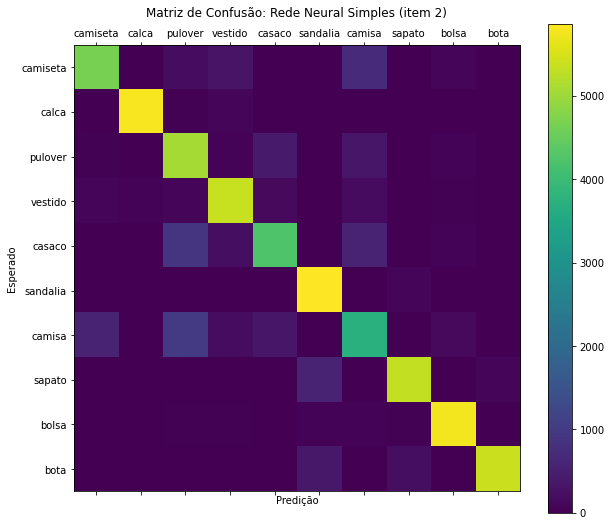

In [ ]:
# TODO: Plot the confusion matrix. You can use scikit-learn libraries.

y_pred = np.array([])
for i in saida:
  y_pred = np.append(y_saida,np.argmax(i))

y_verdade = np.array([])
for i in y_teste:
  y_verdade = np.append(y_verdade,np.argmax(i))


labels = ['camiseta','calca','pulover','vestido','casaco','sandalia','camisa','sapato','bolsa','bota']
c_m = confusion_matrix(y_verdade, y_saida)

figura = plt.figure(figsize=(10,9))
axis = figura.add_subplot(111)
caxis = axis.matshow(c_m)
plt.title('Matriz de Confusão: Rede Neural Simples (item 2)')
figura.colorbar(caxis)
plt.xticks([0,1,2,3,4,5,6,7,8,9],labels)
plt.yticks([0,1,2,3,4,5,6,7,8,9],labels)
plt.xlabel('Predição')
plt.ylabel('Esperado')
plt.show()

> What are the conclusions? (1-2 paragraphs)


Para a matriz de confusão, usamos o segundo modelo (Rede Neural Simples), analisando a matriz, percebemos que o desempenho do algoritmo foi aceitavel, a medida que identificamos que a maior parte dos erros/confusões estão concentrados em objetos parecidos, como por exemplo, Camisa e Camiseta, Pulover e Camisa, Pulover e casaco, sapato e sandalia, casaco e camisa. Vale notar também, que o item que mais se difere dos outros, a bolsa, teve uma taxa de erro de predição quase nula.

Sendo assim, considerando que este algoritmo foi pouco otimizado, o desempenho foi bem satisfatorio. Um possivel proximo passo para a melhora deste algoritmo consistiria em desenvolver uma forma de melhor diferenciar objetos mais parecidos que tiveram as maiores taxas de erro como os casos da Camisa/Pulover e Pulover/Casaco.